In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import math

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named Noah
from Noah import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Optimal parental investment: 0.2003270380467629
Human capital level: 1.6456489822863487
Optimal income: 2.1456489822863487


In [15]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Optimal X0: 0.20202020202020202
Optimal E1: 1.42
Optimal H1: 1.95342161035749
Optimal Y1: 2.45342161035749
Optimal D1: 0.20202020202020243


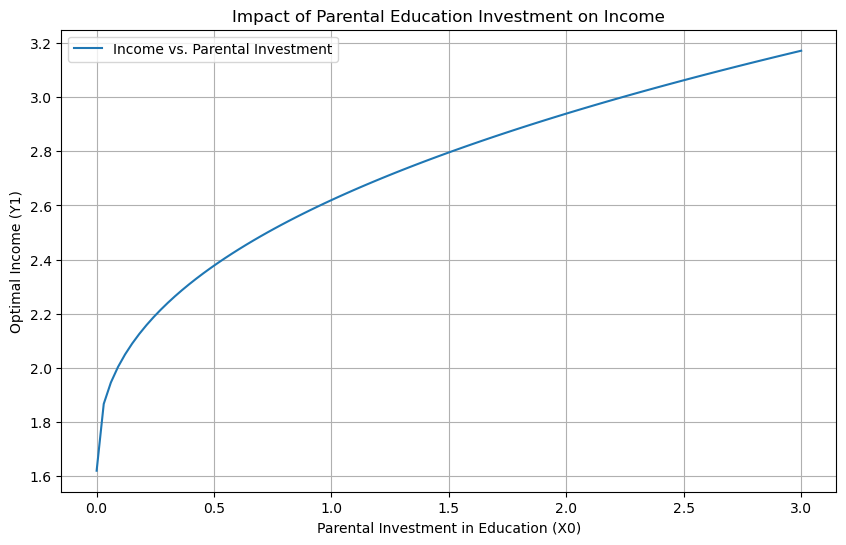

In [16]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education (X0)')
plt.ylabel('Optimal Income (Y1)')
plt.title('Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
def interactive_plot(Y0):
    model.par.Y0 = Y0
    X0_values = np.linspace(0, 1, 100)  # Parental investment range
    Y1_values = []

    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, Y0)
        Y1_values.append(Y1)

    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness (I1) = {Y0:.2f}')
    plt.xlabel('Parental Investment in Education (X0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.ylim(2.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

Y0_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness (I1)')
interact(interactive_plot, Y0=Y0_slider)

interactive(children=(FloatSlider(value=0.5, description='Luckiness (I1)', max=1.0, step=0.05), Output()), _do…

<function __main__.interactive_plot(Y0)>

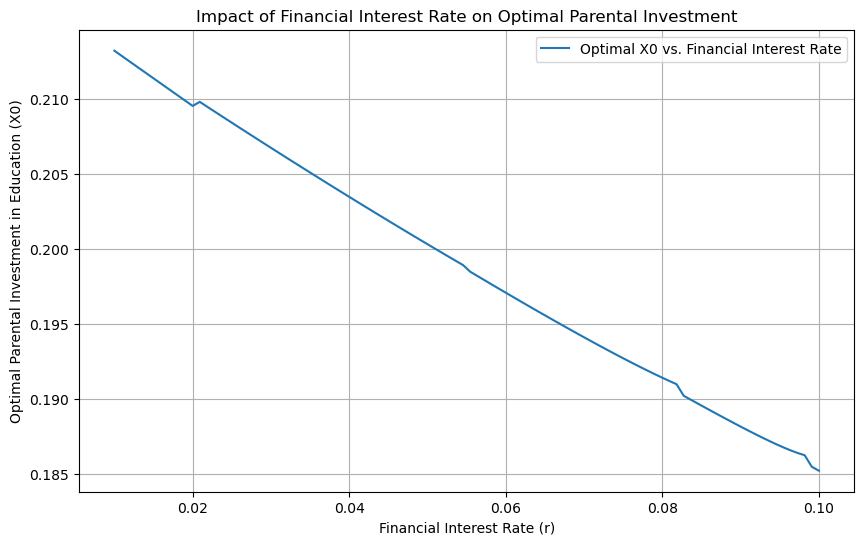

In [21]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Set a range of values for the rate of return (r)
r_values = np.linspace(0.01, 0.1, 100)  # Range of rates of return
X0_values_at_optimal = []  # List to hold X0 values at optimal points

for r in r_values:
    model.par.rt = r  # Update the rate of return in the model
    model.solve_continuous()  # Solve the model
    X0_values_at_optimal.append(model.sol.optimal_X)  # Collect the optimal X0 for each rate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, X0_values_at_optimal, label='Optimal X0 vs. Financial Interest Rate')
plt.xlabel('Financial Interest Rate (r)')
plt.ylabel('Optimal Parental Investment in Education (X0)')
plt.title('Impact of Financial Interest Rate on Optimal Parental Investment')
plt.grid(True)
plt.legend()
plt.show()


This could suggest that when returns on investments outside of education (perhaps financial markets or alternative investment opportunities) become more attractive (i.e., higher r), parents opt to invest less in education, potentially due to a shift in priorities towards more immediately lucrative opportunities. 

In [19]:
# Initialize the model
model = BeckerTomesModelDebugged()

def interactive_plot(h):
    model.par.h = h  # Update the inheritability of endowments
    E0_values = np.linspace(0, 10, 100)  # Range of initial endowments
    Y1_values = []  # List to hold Y1 values

    for E0 in E0_values:
        model.par.E0 = E0  # Update the initial endowment in the model
        solution = model.solve_continuous()  # Solve the model
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(E0)
            H1 = model.human_capital_production(model.sol.optimal_X, model.par.S0, E1)
            Y1 = model.calc_income(H1, model.par.I1)
            Y1_values.append(Y1)  # Collect the optimal Y1 for each E0
        else:
            Y1_values.append(None)  # Append None or a default value if optimal_X is not available

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(E0_values, Y1_values, label=f'Inheritability (h) = {h:.2f}')
    plt.xlabel('Initial Endowment (E0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Initial Endowment on Optimal Income with Varying Inheritability')
    plt.ylim(1.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

h_slider = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Inheritability (h)')
interact(interactive_plot, h=h_slider)

interactive(children=(FloatSlider(value=0.5, description='Inheritability (h)', max=1.0, step=0.01), Output()),…

<function __main__.interactive_plot(h)>